<a href="https://colab.research.google.com/github/khoile99999/Heuristic_Search_CMPUT_498/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing the Dataset

// Heuristic = Lamda (just a thing to note for myself)


In [ ]:
!pip install maze-dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.2 which is incompatible.


https://github.com/understanding-search/maze-dataset

In [ ]:
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators, SolvedMaze
from maze_dataset.tokenization import MazeTokenizer, TokenizationMode
from maze_dataset.plotting import plot_dataset_mazes
from maze_dataset.plotting.print_tokens import display_color_tokens_rgb, display_color_tokens_cmap, display_color_maze_tokens_AOTP
from maze_dataset.utils import corner_first_ndindex
import numpy as np

n_mazes = 10
maze_size = 10
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="main", # name is only for you to keep track of things
	grid_n=maze_size, # number of rows/columns in the lattice
	n_mazes=n_mazes, # number of mazes to generate
	maze_ctor=LatticeMazeGenerators.gen_dfs_percolation, # algorithm to generate the maze
    maze_ctor_kwargs=dict(p=0.3), # additional parameters to pass to the maze generation algorithm
)

In [ ]:
dataset: MazeDataset = MazeDataset.from_config(
    # your config
	cfg,
    # and all this below is completely optional
	# do_download=False,
	# load_local=False,
	# do_generate=True,
    # save_local=True,
	# gen_parallel=False,
)

In [ ]:
len(dataset)

10

(<Figure size 1000x200 with 10 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

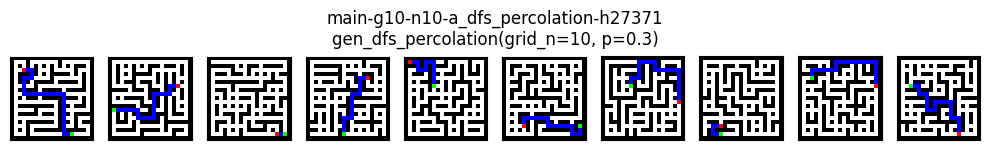

In [ ]:
plot_dataset_mazes(dataset)

Visualizing a maze

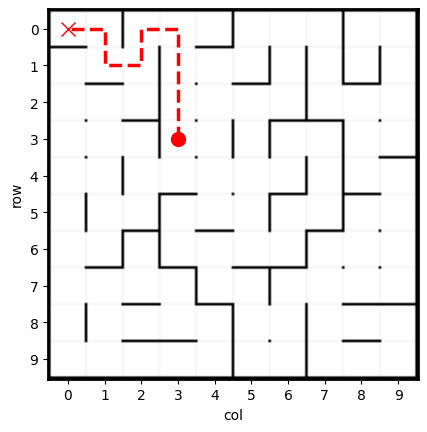

In [ ]:
# advanced visualization with many features
from maze_dataset.plotting import MazePlot
MazePlot(dataset[4]).plot()

In [ ]:
dataset[4].connection_list[0] # DOWN AND UP CONNECTIONS. If true, it means you can pass.

array([[False,  True,  True,  True, False,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True,  True, False,  True,  True, False,
         True],
       [ True,  True, False,  True,  True,  True, False, False,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True, False,  True,  True, False,  True, False,
         True],
       [ True,  True, False,  True, False,  True,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False, False,  True,  True,
         True],
       [ True,  True, False,  True, False,  True,  True,  True, False,
        False],
       [ True,  True, False, False,  True,  True,  True,  True, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
dataset[4].connection_list[1] # SIDEWAYS CONNECTIONS. If ture, it means you can pass.

array([[ True, False,  True,  True, False,  True,  True, False,  True,
        False],
       [ True,  True, False,  True,  True, False, False, False, False,
        False],
       [ True,  True, False,  True,  True,  True, False,  True,  True,
        False],
       [ True,  True, False,  True, False, False,  True, False,  True,
        False],
       [ True, False,  True,  True,  True,  True, False, False,  True,
        False],
       [False,  True, False,  True,  True, False,  True, False,  True,
        False],
       [ True, False, False,  True,  True,  True, False,  True,  True,
        False],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
        False],
       [False,  True,  True,  True, False,  True, False,  True,  True,
        False],
       [ True,  True,  True,  True, False,  True, False,  True,  True,
        False]])

In [ ]:
dataset[2]

SolvedMaze(connection_list=array([[[False, False, False,  True,  True, False,  True, False, False,
          True],
        [ True, False,  True, False,  True,  True,  True,  True,  True,
         False],
        [ True, False, False, False, False, False,  True, False, False,
          True],
        [ True, False,  True,  True, False, False, False,  True,  True,
          True],
        [ True,  True,  True,  True, False,  True,  True, False,  True,
         False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True, False,  True, False,  True,  True, False, False,
          True],
        [ True, False,  True,  True,  True,  True, False, False, False,
          True],
        [ True,  True,  True,  True,  True, False, False,  True,  True,
          True],
        [False, False, False, False, False, False, False, False, False,
         False]],

       [[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         

Getting the start state for the first map

In [ ]:
dataset[4].start_pos

array([3, 3])

Getting the goal state for the first map

In [ ]:
dataset[4].end_pos

array([0, 0])

In [ ]:
a = True

if a == 0:
    print("a")

## Implementing A*

In [ ]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end, heuristic_func):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    walls_downward = maze.connection_list[0] # counting downward
    walls_sideways = maze.connection_list[1] # counting sideways

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # print(current_node.position)

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], len(closed_list) # Return reversed path

        # Generate children
        children = []

        # for new_position in [(-1, 0), (1, 0)]: # Adjacent up or down
        going_up = (-1,0)
        going_down = (1,0)
        going_left = (0,-1)
        going_right = (0,1)

        # FOR GOING UP
        # Get node position
        node_position = (current_node.position[0] + going_up[0], current_node.position[1] + going_up[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going up", node_position, "not walkable. Looked at [0]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING DOWN
        # Get node position
        node_position = (current_node.position[0] + going_down[0], current_node.position[1] + going_down[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]-1][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going down", node_position, "not walkable. Looked at [0]'s", node_position[0]-1, node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING LEFT
        # Get node position
        node_position = (current_node.position[0] + going_left[0], current_node.position[1] + going_left[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going left", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)

        # FOR GOING RIGHT
        # Get node position
        node_position = (current_node.position[0] + going_right[0], current_node.position[1] + going_right[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1] - 1] == False): # and ((node_position[0], node_position[1]) != end):
            # print("")
            # print("Going right", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1] - 1)
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)


        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            # child.h = abs(child.position[0] - end_node.position[0]) + abs(child.position[1] - end_node.position[1])
            child.h = heuristic_func(child.position, end_node.position)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)



In [ ]:
heuristic_functions = [
    lambda current, end: (current[0] ** 2) / 3 + (current[1] / 9),
    lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),
    # Add more heuristic functions here
]

all_states_expanded = []
n_mazes = 10
maze_size = 10
for heuristic_func in heuristic_functions:
    curr_states_expanded = []
    for i in range(n_mazes):
        print("Solving maze number", i)
        curr_map = dataset[i]
        path, states_expanded = astar(curr_map, tuple(curr_map.start_pos), tuple(curr_map.end_pos), heuristic_func)
        curr_states_expanded.append(states_expanded)
        print("SOLVED")
    all_states_expanded.append(curr_states_expanded)

for i in range(len(all_states_expanded)):
    print("Average states expanded for Heuristic {} is {}".format(i, np.mean(all_states_expanded[i])))


## Trying to synthesize heuristics using GA

import random

# Define the grid environment
class GridEnvironment:
    def __init__(self, width, height, obstacles):
        self.width = width
        self.height = height
        self.obstacles = obstacles

    def is_valid_position(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

# Define the individual (path)
class Path:
    def __init__(self, environment):
        self.environment = environment
        self.path = []
        self.fitness = self.evaluate()

    def evaluate(self):
        # Calculate the Manhattan distance from start to goal
        start = (0, 0)
        goal = (self.environment.width - 1, self.environment.height - 1)
        return -abs(start[0] - goal[0]) - abs(start[1] - goal[1])

# Genetic Algorithm operations
def initialize_population(population_size, environment):
    population = [Path(environment) for _ in range(population_size)]
    return population

def select_parents(population, num_parents):
    # Select the best individuals based on their fitness
    return sorted(population, key=lambda x: x.fitness, reverse=True)[:num_parents]

def crossover(parents, num_offsprings):
    offsprings = []
    for _ in range(num_offsprings):
        parent1, parent2 = random.sample(parents, 2)
        offspring = Path(parent1.environment)
        # Combine the paths of parents (e.g., one-point crossover)
        crossover_point = random.randint(1, min(len(parent1.path), len(parent2.path)) - 1)
        offspring.path = parent1.path[:crossover_point] + parent2.path[crossover_point:]
        offsprings.append(offspring)
    return offsprings

def mutate(individual, mutation_rate):
    # Introduce mutations in the path (e.g., random moves)
    for _ in range(len(individual.path)):
        if random.random() < mutation_rate:
            individual.path[random.randint(0, len(individual.path) - 1)] = random.choice(['up', 'down', 'left', 'right'])

# Main Genetic Algorithm
def genetic_algorithm(environment, population_size, num_generations, num_offsprings, mutation_rate):
    population = initialize_population(population_size, environment)

    for generation in range(num_generations):
        parents = select_parents(population, num_offsprings)
        offsprings = crossover(parents, num_offsprings)
        for offspring in offsprings:
            mutate(offspring, mutation_rate)
        population = offsprings

        # Print the best path in this generation
        best_path = max(population, key=lambda x: x.fitness)
        print(f"Generation {generation + 1}: Manhattan Distance - {abs(best_path.fitness)}")

    best_path = max(population, key=lambda x: x.fitness)
    return best_path

if __name__ == "__main__":
    obstacles = [(2, 1), (2, 2), (2, 3), (2, 4)]  # Define obstacle positions
    environment = GridEnvironment(5, 5, obstacles)
    best_path = genetic_algorithm(environment, population_size=50, num_generations=50, num_offsprings=25, mutation_rate=0.1)
    print("Best path:", best_path.path)


In [ ]:
## Trying to synthesize heuristics using GA

import random
import numpy as np

# Define the grid environment
class GridEnvironment:
    def __init__(self, width, height, obstacles):
        self.width = width
        self.height = height
        self.obstacles = obstacles

    def is_valid_position(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

# Define the individual (path)
class Path:
    def __init__(self, environment, heuristic_func):
        self.environment = environment
        self.heuristic_func = heuristic_func
        self.path = []
        self.fitness = self.evaluate()

    def evaluate(self):
        # Calculate the heuristic value for the path using A* search
        start = (0, 0)
        goal = (self.environment.width - 1, self.environment.height - 1)
        path, states_expanded = astar(self.environment, start, goal, self.heuristic_func)
        return -states_expanded

# A* Search Algorithm
def astar(environment, start, goal, heuristic_func):
    # Implement A* search algorithm here (not shown in this example)
    # This function should return a path and the number of states expanded
    pass

# Genetic Algorithm operations
def initialize_population(population_size, environment, heuristic_func):
    population = [Path(environment, heuristic_func) for _ in range(population_size)]
    return population

def select_parents(population, num_parents):
    # Select the best individuals based on their fitness
    return sorted(population, key=lambda x: x.fitness, reverse=True)[:num_parents]

def crossover(parents, num_offsprings):
    offsprings = []
    for _ in range(num_offsprings):
        parent1, parent2 = random.sample(parents, 2)
        offspring = Path(parent1.environment, parent1.heuristic_func)
        # Combine the paths of parents (e.g., one-point crossover)
        crossover_point = random.randint(1, min(len(parent1.path), len(parent2.path)) - 1)
        offspring.path = parent1.path[:crossover_point] + parent2.path[crossover_point:]
        offsprings.append(offspring)
    return offsprings

def mutate(individual, mutation_rate):
    # Introduce mutations in the path (e.g., random moves)
    for _ in range(len(individual.path)):
        if random.random() < mutation_rate:
            individual.path[random.randint(0, len(individual.path) - 1)] = random.choice(['up', 'down', 'left', 'right'])

# Main Genetic Algorithm
def genetic_algorithm(environment, population_size, num_generations, num_offsprings, mutation_rate, heuristic_func):
    population = initialize_population(population_size, environment, heuristic_func)

    for generation in range(num_generations):
        parents = select_parents(population, num_offsprings)
        offsprings = crossover(parents, num_offsprings)
        for offspring in offsprings:
            mutate(offspring, mutation_rate)
        population = offsprings

        # Print the best path in this generation
        best_path = max(population, key=lambda x: x.fitness)
        print(f"Generation {generation + 1}: Heuristic Value - {abs(best_path.fitness)}")

    best_path = max(population, key=lambda x: x.fitness)
    return best_path

if __name__ == "__main__":
    obstacles = [(2, 1), (2, 2), (2, 3), (2, 4)]  # Define obstacle positions
    environment = GridEnvironment(5, 5, obstacles)

    heuristic_functions = [
        lambda current, end: (current[0] ** 2) / 3 + (current[1] / 9),
        lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),
        # Add more heuristic functions here
    ]

    for i, heuristic_func in enumerate(heuristic_functions):
        best_path = genetic_algorithm(environment, population_size=50, num_generations=50, num_offsprings=25, mutation_rate=0.1, heuristic_func=heuristic_func)
        print(f"Heuristic {i}: Best path - {best_path.path}")


TypeError: ignored

In [ ]:
# Heuristics using GAs with weight

import random
import numpy as np

# Define the grid environment
class GridEnvironment:
    def __init__(self, width, height, obstacles):
        self.width = width
        self.height = height
        self.obstacles = obstacles

    def is_valid_position(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

# Define the individual (heuristic)
class Heuristic:
    def __init__(self):
        self.weights = [random.uniform(0, 1), random.uniform(0, 1)]

    def evaluate(self, current, goal):
        # Simple weighted sum heuristic
        return self.weights[0] * abs(current[0] - goal[0]) + self.weights[1] * abs(current[1] - goal[1])

# Genetic Algorithm operations
def initialize_population(population_size):
    population = [Heuristic() for _ in range(population_size)]
    return population

def select_parents(population, num_parents):
    # Select the best individuals based on their fitness (heuristic performance)
    return sorted(population, key=lambda x: evaluate_heuristic(x), reverse=True)[:num_parents]

def crossover(parents, num_offsprings):
    offsprings = []
    for _ in range(num_offsprings):
        parent1, parent2 = random.sample(parents, 2)
        offspring = Heuristic()
        # Combine the weights of parents (e.g., arithmetic mean)
        offspring.weights = [(parent1.weights[i] + parent2.weights[i]) / 2 for i in range(len(parent1.weights))]
        offsprings.append(offspring)
    return offsprings

def mutate(individual, mutation_rate):
    # Introduce mutations in the weights
    for i in range(len(individual.weights):
        if random.random() < mutation_rate:
            individual.weights[i] = random.uniform(0, 1)

# Main Genetic Algorithm
def genetic_algorithm(population_size, num_generations, num_offsprings, mutation_rate):
    population = initialize_population(population_size)

    for generation in range(num_generations):
        parents = select_parents(population, num_offsprings)
        offsprings = crossover(parents, num_offsprings)
        for offspring in offsprings:
            mutate(offspring, mutation_rate)
        population = offsprings

        # Print the best heuristic in this generation
        best_heuristic = max(population, key=lambda x: evaluate_heuristic(x))
        print(f"Generation {generation + 1}: Best Heuristic - {best_heuristic.weights}")

    best_heuristic = max(population, key=lambda x: evaluate_heuristic(x))
    return best_heuristic

# Define a function to evaluate the performance of a heuristic (e.g., based on A* search)
def evaluate_heuristic(heuristic):
    environment = GridEnvironment(5, 5, [(2, 1), (2, 2), (2, 3), (2, 4)])  # Define obstacle positions
    start = (0, 0)
    goal = (4, 4)
    return astar(environment, start, goal, heuristic)

# A* Search Algorithm (Simplified for demonstration)
def astar(environment, start, goal, heuristic):
    # Implement A* search algorithm here (not shown in this example)
    # This function should return a path cost
    # In this simplified example, we return a random value.
    return random.uniform(0, 10)

if __name__ == "__main__":
    best_heuristic = genetic_algorithm(population_size=50, num_generations=50, num_offsprings=25, mutation_rate=0.1)
    print("Best Heuristic Weights:", best_heuristic.weights)

Solving maze number 0
SOLVED
Solving maze number 1
SOLVED
Solving maze number 2
SOLVED
Solving maze number 3
SOLVED
Solving maze number 4
SOLVED
Solving maze number 5
SOLVED
Solving maze number 6
SOLVED
Solving maze number 7
SOLVED
Solving maze number 8
SOLVED
Solving maze number 9
SOLVED
Solving maze number 0
SOLVED
Solving maze number 1
SOLVED
Solving maze number 2
SOLVED
Solving maze number 3
SOLVED
Solving maze number 4
SOLVED
Solving maze number 5
SOLVED
Solving maze number 6
SOLVED
Solving maze number 7
SOLVED
Solving maze number 8
SOLVED
Solving maze number 9
SOLVED
Average states expanded for Heuristic 0 is 116.1
Average states expanded for Heuristic 1 is 35.1


TypeError: ignored

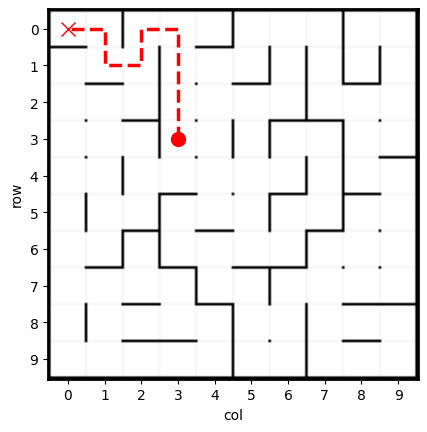

In [ ]:
from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators, SolvedMaze
from maze_dataset.tokenization import MazeTokenizer, TokenizationMode
from maze_dataset.plotting import plot_dataset_mazes
from maze_dataset.plotting.print_tokens import display_color_tokens_rgb, display_color_tokens_cmap, display_color_maze_tokens_AOTP
from maze_dataset.utils import corner_first_ndindex
import numpy as np

n_mazes = 10
maze_size = 10
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="main", # name is only for you to keep track of things
	grid_n=maze_size, # number of rows/columns in the lattice
	n_mazes=n_mazes, # number of mazes to generate
	maze_ctor=LatticeMazeGenerators.gen_dfs_percolation, # algorithm to generate the maze
    maze_ctor_kwargs=dict(p=0.3), # additional parameters to pass to the maze generation algorithm
)

dataset: MazeDataset = MazeDataset.from_config(
    # your config
	cfg,
    # and all this below is completely optional
	# do_download=False,
	# load_local=False,
	# do_generate=True,
    # save_local=True,
	# gen_parallel=False,
)

len(dataset)
# advanced visualization with many features
from maze_dataset.plotting import MazePlot
MazePlot(dataset[4]).plot()

dataset[4].connection_list[0] # DOWN AND UP CONNECTIONS. If true, it means you can pass.

dataset[4].connection_list[1] # SIDEWAYS CONNECTIONS. If ture, it means you can pass.

a = True

if a == 0:
    print("a")

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end, heuristic_func):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    walls_downward = maze.connection_list[0] # counting downward
    walls_sideways = maze.connection_list[1] # counting sideways

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # print(current_node.position)

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1], len(closed_list) # Return reversed path

        # Generate children
        children = []

        # for new_position in [(-1, 0), (1, 0)]: # Adjacent up or down
        going_up = (-1,0)
        going_down = (1,0)
        going_left = (0,-1)
        going_right = (0,1)

        # FOR GOING UP
        # Get node position
        node_position = (current_node.position[0] + going_up[0], current_node.position[1] + going_up[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going up", node_position, "not walkable. Looked at [0]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING DOWN
        # Get node position
        node_position = (current_node.position[0] + going_down[0], current_node.position[1] + going_down[1])
        # Make sure within range
        if node_position[0] > (len(walls_downward) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_downward[len(walls_downward)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_downward[node_position[0]-1][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going down", node_position, "not walkable. Looked at [0]'s", node_position[0]-1, node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)



        # FOR GOING LEFT
        # Get node position
        node_position = (current_node.position[0] + going_left[0], current_node.position[1] + going_left[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1]] == False): # and ((node_position[0], node_position[1]) != end):
            # print("Going left", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1])
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)

        # FOR GOING RIGHT
        # Get node position
        node_position = (current_node.position[0] + going_right[0], current_node.position[1] + going_right[1])
        # Make sure within range
        if node_position[0] > (len(walls_sideways) - 1) or node_position[0] < 0 or node_position[1] > (len(walls_sideways[len(walls_sideways)-1]) -1) or node_position[1] < 0:
            # print(node_position, "not in range")
            pass
        # Make sure walkable terrain
        elif (walls_sideways[node_position[0]][node_position[1] - 1] == False): # and ((node_position[0], node_position[1]) != end):
            # print("")
            # print("Going right", node_position, "not walkable. Looked at [1]'s", node_position[0], node_position[1] - 1)
            pass
        elif Node(current_node, node_position) in closed_list:
            # print(node_position, "is in closed list")
            pass
        else:
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)


        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            # child.h = abs(child.position[0] - end_node.position[0]) + abs(child.position[1] - end_node.position[1])
            child.h = heuristic_func(child.position, end_node.position)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

heuristic_functions = [
    lambda current, end: (current[0] ** 2) / 3 + (current[1] / 9),
    lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),
    # Add more heuristic functions here
]

all_states_expanded = []
n_mazes = 10
maze_size = 10
for heuristic_func in heuristic_functions:
    curr_states_expanded = []
    for i in range(n_mazes):
        print("Solving maze number", i)
        curr_map = dataset[i]
        path, states_expanded = astar(curr_map, tuple(curr_map.start_pos), tuple(curr_map.end_pos), heuristic_func)
        curr_states_expanded.append(states_expanded)
        print("SOLVED")
    all_states_expanded.append(curr_states_expanded)

for i in range(len(all_states_expanded)):
    print("Average states expanded for Heuristic {} is {}".format(i, np.mean(all_states_expanded[i])))


import random
import numpy as np

# Define the grid environment
class GridEnvironment:
    def __init__(self, width, height, obstacles):
        self.width = width
        self.height = height
        self.obstacles = obstacles

    def is_valid_position(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

# Define the individual (path)
class Path:
    def __init__(self, environment, heuristic_func):
        self.environment = environment
        self.heuristic_func = heuristic_func
        self.path = []
        self.fitness = self.evaluate()

    def evaluate(self):
        # Calculate the heuristic value for the path using A* search
        start = (0, 0)
        goal = (self.environment.width - 1, self.environment.height - 1)
        path, states_expanded = astar(self.environment, start, goal, self.heuristic_func)
        return -states_expanded

# A* Search Algorithm
def astar(environment, start, goal, heuristic_func):
    # Implement A* search algorithm here (not shown in this example)
    # This function should return a path and the number of states expanded
    pass

# Genetic Algorithm operations
def initialize_population(population_size, environment, heuristic_func):
    population = [Path(environment, heuristic_func) for _ in range(population_size)]
    return population

def select_parents(population, num_parents):
    # Select the best individuals based on their fitness
    return sorted(population, key=lambda x: x.fitness, reverse=True)[:num_parents]

def crossover(parents, num_offsprings):
    offsprings = []
    for _ in range(num_offsprings):
        parent1, parent2 = random.sample(parents, 2)
        offspring = Path(parent1.environment, parent1.heuristic_func)
        # Combine the paths of parents (e.g., one-point crossover)
        crossover_point = random.randint(1, min(len(parent1.path), len(parent2.path)) - 1)
        offspring.path = parent1.path[:crossover_point] + parent2.path[crossover_point:]
        offsprings.append(offspring)
    return offsprings

def mutate(individual, mutation_rate):
    # Introduce mutations in the path (e.g., random moves)
    for _ in range(len(individual.path)):
        if random.random() < mutation_rate:
            individual.path[random.randint(0, len(individual.path) - 1)] = random.choice(['up', 'down', 'left', 'right'])

# Main Genetic Algorithm
def genetic_algorithm(environment, population_size, num_generations, num_offsprings, mutation_rate, heuristic_func):
    population = initialize_population(population_size, environment, heuristic_func)

    for generation in range(num_generations):
        parents = select_parents(population, num_offsprings)
        offsprings = crossover(parents, num_offsprings)
        for offspring in offsprings:
            mutate(offspring, mutation_rate)
        population = offsprings

        # Print the best path in this generation
        best_path = max(population, key=lambda x: x.fitness)
        print(f"Generation {generation + 1}: Heuristic Value - {abs(best_path.fitness)}")

    best_path = max(population, key=lambda x: x.fitness)
    return best_path

if __name__ == "__main__":
    obstacles = [(2, 1), (2, 2), (2, 3), (2, 4)]  # Define obstacle positions
    environment = GridEnvironment(5, 5, obstacles)

    heuristic_functions = [
        lambda current, end: (current[0] ** 2) / 3 + (current[1] / 9),
        lambda current, end: abs(current[0] - end[0]) + abs(current[1] - end[1]),
        # Add more heuristic functions here
    ]

    for i, heuristic_func in enumerate(heuristic_functions):
        best_path = genetic_algorithm(environment, population_size=50, num_generations=50, num_offsprings=25, mutation_rate=0.1, heuristic_func=heuristic_func)
        print(f"Heuristic {i}: Best path - {best_path.path}")
